# Importando as bibliotecas pandas e matplotlib

In [40]:
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd

# Carregando nosso dataset de cancer de mama

In [41]:
cancer_de_mama = datasets.load_breast_cancer()
cancer_df = pd.DataFrame(data=cancer_de_mama["data"], columns=cancer_de_mama["feature_names"])
cancer_df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


Vamos adicionar mais duas colunas a nossa tabela. Uma com a classe de cada exemplo e uma outra também com a classe
mas em formato de texto para facilitar a leitura.

Observem como a função apply da nossa tabela foi usada para criar uma nova coluna. Essa função recebe uma outra função que recebe a linha atual para ser processada.

In [42]:
cancer_df_with_labels = cancer_df.copy()
cancer_df_with_labels["classe"] = cancer_de_mama["target"]
cancer_df_with_labels["label"] = cancer_df_with_labels.apply(
    lambda row: cancer_de_mama["target_names"][int(row["classe"])],
    axis=1
)
cancer_df_with_labels.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,classe,label
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant


Vamos dividir nossa tabela em duas. Uma para utilizarmos como conjunto de treino para o nosso classificador
e um para simularmos o uso do classificador uma vez que ele tenha sido treinado.

A função train_test_split faz essa divisão para nós. Ela recebe 3 parametros: o conjunto de features de treino,
as classes desse conjunto, e um inteiro que é usado como semente para o gerador de números aleatórios que é usado para separar nosso conjunto em 2.

In [43]:
from sklearn.model_selection import train_test_split
cancer_de_mama_simplificado = cancer_df[['mean radius', 'mean texture']] # Usando duas features para facilitar a visualização
X_treino, X_teste, y_treino, y_teste = train_test_split(cancer_de_mama_simplificado, cancer_de_mama["target"], random_state=0)

## Importando o KNN e criando nosso classificador

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_treino, y_treino)
knn.score(X_teste, y_teste)

0.8881118881118881

Observem como os exemplos contidos nos datasets de treino e de teste estão distribuídos no espaço das features. 

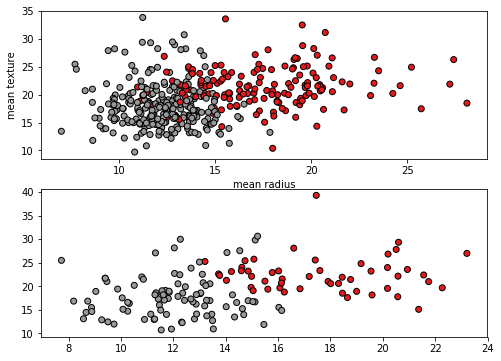

In [46]:
import matplotlib.pyplot as plt

def plot_dataset(classifier):
    plt.figure(2, figsize=(8, 6))
    plt.clf()

    plt.xlabel('mean radius')
    plt.ylabel('mean texture')
    plt.xticks(())
    plt.yticks(())

    x_max, y_max = X_teste.max()
    x_min, y_min = X_teste.min()
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.subplot(2, 1, 1)
    plt.scatter(X_treino['mean radius'], X_treino['mean texture'], c=list(y_treino), cmap=plt.cm.Set1, edgecolor='k')
    plt.xlabel('mean radius')
    plt.ylabel('mean texture')

    plt.subplot(2, 1, 2)
    plt.scatter(X_teste['mean radius'], X_teste['mean texture'], c=classifier.predict(X_teste), cmap=plt.cm.Set1, edgecolor='k')


    return plt.show()

plot_dataset(knn)

Observem como a qualidade do modelo é impactada pela escolha para o parametro K (n_neighbors - número de visinhos

# Treinando uma árvore de decisão

In [47]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_treino, y_treino)
decision_tree.score(X_teste, y_teste)

0.8951048951048951

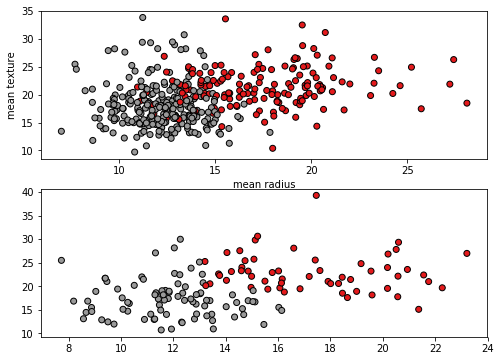

In [48]:
plot_dataset(decision_tree)

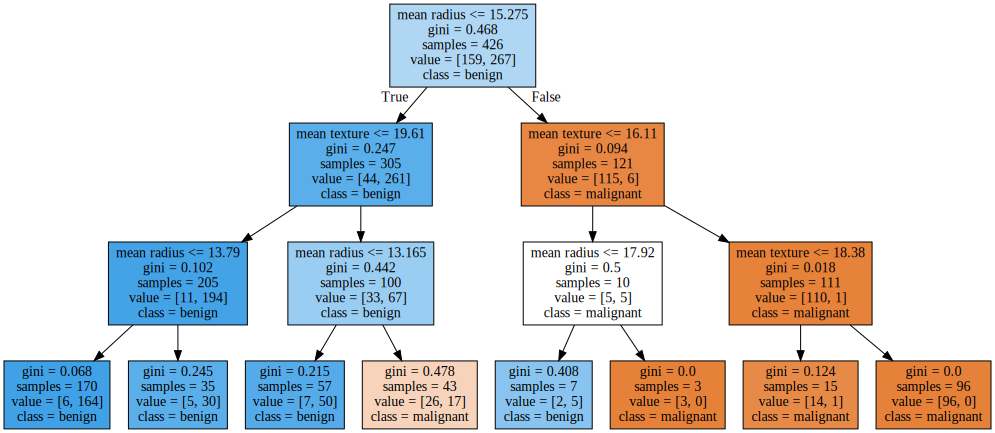

In [49]:
from sklearn import tree
from IPython.display import SVG
# PRECISA INSTALAR O python-graphviz (conda install python-graphviz)
from graphviz import Source
from IPython.display import display

graph = Source(
    tree.export_graphviz(
        decision_tree,
        out_file=None,
        feature_names=cancer_de_mama_simplificado.columns,
        class_names=cancer_de_mama["target_names"],
        filled = True
    )
)
display(SVG(graph.pipe(format='svg')))

# Treinando uma logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression(solver="lbfgs")
logistic_regression.fit(X_treino, y_treino)
logistic_regression.score(X_teste, y_teste)

0.9020979020979021

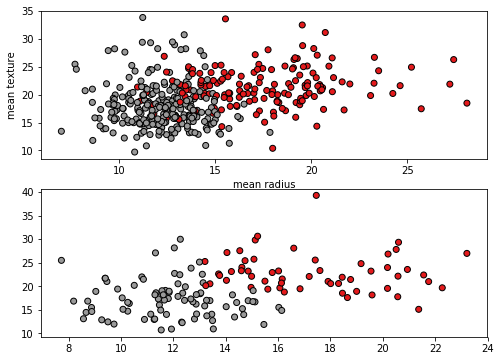

In [51]:
plot_dataset(decision_tree)

In [52]:
logistic_regression.predict(X_teste.iloc[0:3])

array([1, 1, 1])

In [53]:
logistic_regression.predict_proba(X_teste.iloc[0:3])

array([[0.25065415, 0.74934585],
       [0.44331247, 0.55668753],
       [0.17455823, 0.82544177]])

In [54]:
for i, prediction in enumerate(logistic_regression.predict_proba(X_teste.iloc[0:3])):
    for prob, label in zip(prediction, cancer_de_mama["target_names"]):
        print ("exemplo {} é {}\tcom {:.2f} de probabilidade".format(i, label, prob))

exemplo 0 é malignant	com 0.25 de probabilidade
exemplo 0 é benign	com 0.75 de probabilidade
exemplo 1 é malignant	com 0.44 de probabilidade
exemplo 1 é benign	com 0.56 de probabilidade
exemplo 2 é malignant	com 0.17 de probabilidade
exemplo 2 é benign	com 0.83 de probabilidade
